In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [32]:
(xtrain, ytrain), (xtest, ytest) = boston_housing.load_data()

In [33]:
scaler = MinMaxScaler()
xtrain_normalized = scaler.fit_transform(xtrain)
xtest_normalized = scaler.transform(xtest)

In [34]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(xtrain_normalized.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(
  loss = tf.keras.losses.mean_squared_error,
  optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.01),
  metrics = ['mse']
)

In [35]:
history = model.fit(xtrain_normalized, ytrain, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 1s 26ms/step - loss: 227.5275 - mse: 227.5275 - val_loss: 144.5179 - val_mse: 144.5179
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 68.2704 - mse: 68.2704 - val_loss: 52.8205 - val_mse: 52.8205
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 46.5120 - mse: 46.5120 - val_loss: 94.0667 - val_mse: 94.0667
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 51.4263 - mse: 51.4263 - val_loss: 84.1715 - val_mse: 84.1715
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 37.2225 - mse: 37.2225 - val_loss: 43.4358 - val_mse: 43.4358
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 32.1848 - mse: 32.1848 - val_loss: 29.4749 - val_mse: 29.4749
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 40.6970 - mse: 40.6970 - val_loss: 29.7222 - val_mse: 29.7222
Epoch 8/100
11/11 [==============================]

In [36]:
loss, mse = model.evaluate(xtest, ytest, batch_size=32)
print(f"model loss on test set: {loss}")
print(f"model mean squared error test set: {mse:.2f}")

4/4 [==============================] - 0s 5ms/step - loss: 38361724.0000 - mse: 38361724.0000
model loss on test set: 38361724.0
model mean squared error test set: 38361724.00


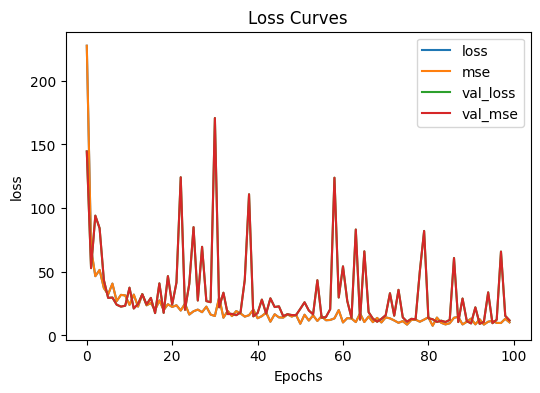

In [37]:
pd.DataFrame(history.history).plot(figsize=(6,4), xlabel='Epochs', ylabel="loss", title="Loss Curves")
plt.show()

In [38]:
ypred = model.predict(xtest)
ypred[0]

4/4 [==============================] - 0s 4ms/step


array([7557.7637], dtype=float32)